<a href="https://colab.research.google.com/github/matthew110395/12004210_DataAnalytics/blob/main/part3_3_1_3_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This will be the first Linear Regressor we will create. In the R sheet you just completed, at the bottom we built a line of best fit through the data using R. Here we will use tensorflow. Simply as we will also be using it to create a more complex DNN regression solution in time. The difference between this sheet and the one using R is that we require a python kernel.

Just like before, the first thing we are going to do is import our data from a csv (hosted on Github which you should have created...or you can just use mine which is in the comments below). To allow us to create a data frame we must import pandas.

pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with structured (tabular, multidimensional, potentially heterogeneous) and time series data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for many different kinds of data:

*   Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
*   Ordered and unordered (not necessarily fixed-frequency) time series data.
*   Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
*   Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.


In [1]:
# needed to create the data frame
import pandas as pd

# create data frame from csv file we hosted on our github
df = pd.read_csv('https://raw.githubusercontent.com/1122131uhi/1122131_DataAnalytics/master/LifeSatisfactionWorldBankData.csv', index_col=0)

Let's have a look at our data. The file is small so it is ok to look at the whole thing, however, I have just selected the first 6. See the comments.

In [2]:
# make sure we have our data by printing it out
print(df[:6])
# print(df) #all

                 Country  Value  GDPPerCapita
LOCATION                                     
AUS            Australia    7.3   49971.13146
AUT              Austria    7.1   45237.80509
BEL              Belgium    6.9   41998.33575
CAN               Canada    7.4   42322.48478
CZE       Czech Republic    6.7   18463.38658
DNK              Denmark    7.6   54663.99837


A common thing to do with your data is to shuffle it, or randomise it. This stops any bias or patterns being inherent with the order of the data and should help make a better fit. In order to do this we require numpy.

NumPy is a module for Python. The name is an acronym for "Numeric Python" or "Numerical Python". It is an extension module for Python, mostly written in C. This makes sure that the precompiled mathematical and numerical functions and functionalities of Numpy guarantee great execution speed.

Furthermore, NumPy enriches the programming language Python with powerful data structures, implementing multi-dimensional arrays and matrices. These data structures guarantee efficient calculations with matrices and arrays. The implementation is even aiming at huge matrices and arrays, better know under the heading of "big data". Besides that the module supplies a large library of high-level mathematical functions to operate on these matrices and arrays.

As with any linear model, we must have value(s) that we enter i.e. (predictor(s)). In our case, we want to predict the Life Satisfaction and the only value we have is GDPPerCapita. So, we want to use GDPPerCapita as our predictor to help us predict the value of Life Satisfaction. Therefore, we need to isolate the GDPPerCapita column and store them in the variable predictors. 

Again, I have printed the first 6 to make sure I have the correct column.

In [3]:
# needed to help with speedy maths based calculations
import numpy as np

# iloc allows us to select by rows. Here, we are shuffling the data by rows determined at random.
shuffle = df.iloc[np.random.permutation(len(df))]

# we are selecting all rows of the columns outliined i.e. The 3rd (2 as indexes start from 0)
predictors = shuffle.iloc[:,2:3]
# Since it is the last column, we can also use
# predictorTest = shuffle.iloc[:,-1]

# print out the first 6 rows of predictors.
print(predictors[:6])

          GDPPerCapita
LOCATION              
AUS        49971.13146
FRA        37037.37419
LVA        14153.41492
CZE        18463.38658
BRA         8710.09669
NLD        46007.85292


In [4]:
# print out the shuffled data (first 5 rows)
shuffle[:5]

,Country,Value,GDPPerCapita
LOCATION,,,
AUS,Australia,7.3,49971.13146
FRA,France,6.5,37037.37419
LVA,Latvia,5.9,14153.41492
CZE,Czech Republic,6.7,18463.38658
BRA,Brazil,6.4,8710.09669


Since we have our predictor(s), we need to use our targets so we can train the model. In our instance we wanto to enter a GDP and estimate the Life Satisfaction Value. So, we need to get the second column.

In [5]:
# Select all rows for the 2nd column (i.e. 1)
targets = shuffle.iloc[:,1:2]

# print out the first 6 rows of the targets data.
print(targets[:6])

          Value
LOCATION       
AUS         7.3
FRA         6.5
LVA         5.9
CZE         6.7
BRA         6.4
NLD         7.4


In [6]:
# A scale is not required here, but the constant will be useful in the assignment.
SCALE_GDP = 1.0

In [7]:
# Split our data into a training set i.e. 80% of the length of the shuffle array
trainsize = int(len(shuffle['Value'])*0.8)
# The test set size is 100% - 80% = 20% of the length of the shuffle array.
testsize = len(shuffle['Value']) - trainsize

# Define the number of input values (predictors)
nppredictors = 1
# Define the number of output values (targets)
noutputs = 1

To carry out all of our regression tasks we will be using Tensorflow. 

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.

TensorFlow offers multiple levels of abstraction so you can choose the right model for your needs. You can build and train models by using the high-level Keras API, which makes getting started with TensorFlow and machine learning easy.

It is far more powerful than what we will be using it for and I suggest you read more about the cool stuff people are doing with it.

In [11]:
# import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers

# check the version
print(tf.__version__)

# needed for high-level file management
import shutil  

# logging for tensorflow
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.INFO)

# removes a saved model from the last training attempt.
#shutil.rmtree('/tmp/linear_regression_trained_model', ignore_errors=True)

# This is the core of our linear regressor

# You can see that we save the model, use the the Adam optimization algorithm, which is an extension 
# to stochastic gradient descent that has recently seen broader adoption for deep learning applications 
# in computer vision and natural language processing and infer real valued columns from input which interprets 
# all inputs as dense, fixed-length float values.

# See the link for more information
# https://www.tensorflow.org/versions/r1.15/api_docs/python/tf/contrib/learn/LinearRegressor
#estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.LinearRegressor(model_dir='/tmp/linear_regression_trained_model', optimizer=tf.train.AdamOptimizer(learning_rate=0.1), enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(predictors.values)))

predictor = np.array(predictors[trainsize:])

predictor_normaliser = layers.Normalization(input_shape=[1,], axis=None)
predictor_normaliser.adapt(predictor)

predictor_model = tf.keras.Sequential([
    predictor_normaliser,
    layers.Dense(units=1)
])

predictor_model.summary()

predictor_model.predict(predictors[:10])

predictor_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = predictor_model.fit(
    predictors[:trainsize].values,
    targets[:trainsize].values.reshape(trainsize, noutputs)/SCALE_GDP,
    epochs=1000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
predictor_model.save('/tmp/linear_regression_trained_model')

# Prints a log to show model is starting to train
#print("starting to train");

# Train the model. Pass in predictor values and target values.
#estimator.fit(predictors[:trainsize].values, targets[:trainsize].values.reshape(trainsize, noutputs)/SCALE_GDP, steps=10000)

# Next, we can check our predictions based on our predictors.
preds = predictor_model.predict(x=predictors[trainsize:].values)

# Apply the Scale value (not really needed here) to the outputs.
#preds['scores']
predslistscale = preds*SCALE_GDP

#pred = format(str(preds)) # useful for checking outputs and printing.

# Calculate RMSE i.e. how good the model works using the predictions and targets.
# i.e. take the difference between the actual and the forecast then square the difference, 
# find the average of all the squares and then find the square root. 
# The RMSE essentially punishes larger errors i.e. it puts a heavier weight on larger errors.
rmse = np.sqrt(np.mean((targets[trainsize:].values - predslistscale)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));


# Calculate the mean of the Life Satisfaction Values.
avg = np.mean(shuffle['Value'][:trainsize])

# Calculate the RMSE using Life Satisfaction Values and the mean of all target values.
# The fit of a proposed regression model should therefore be better than the fit of the mean model.
# In this case, it doesn't seem to be the case but it will vary on every run.
rmse = np.sqrt(np.mean((shuffle['Value'][trainsize:] - avg)**2))
print('Just using average = {0} has RMSE of {1}'.format(avg, rmse));




2.8.2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
LinearRegression has RMSE of 0.4886633646605156
Just using average = 6.463333333333334 has RMSE of 0.7299619472578307


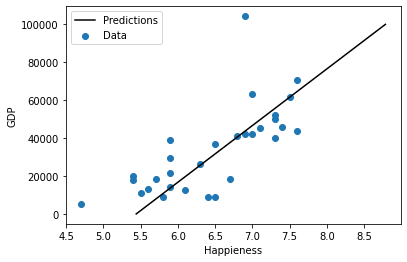

In [12]:
y = tf.linspace(0.0, 100000, 251)
x = predictor_model.predict(y)

def plot_pred(x, y):
  plt.scatter(targets[:trainsize].values,predictors[:trainsize].values, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Happieness')
  plt.ylabel('GDP')
  plt.legend()

plot_pred(x, y)

In many cases, there will be ridiculous results. 
The RMSE of one of my best runs is: 1.333508921213062 and just using the average I get 0.7104067692370178. This shows that our model isn't as good a predictor as using the mean. But, because they are relatively close means that our values are the same. 

As a note, if the RMSE is wildly high, the, run all of the cells again one at a time from the top to reshuffle data. 

With the values above, if I run the cell below I get: [5.4901466] for a GDPPerCapita value of 10000 which is fairly accurate on our line of best fit:

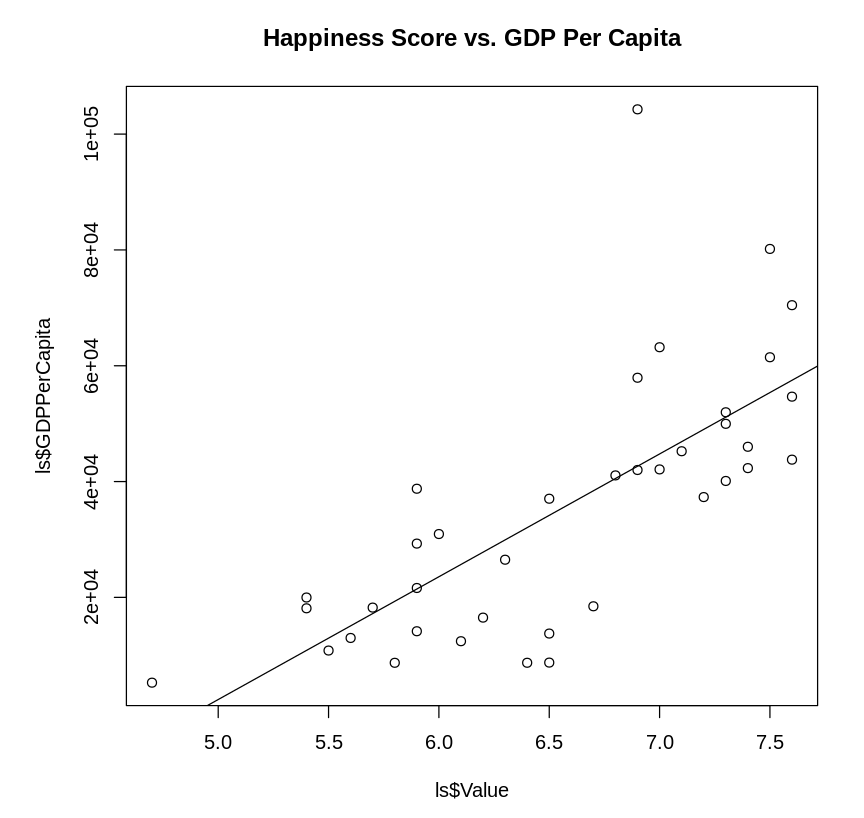

As you can see below, to test our model I pass in a constructed data frame, with the label (the same as the data label for the predictor) of GDPPerPerson and an array with one value in it (I can put more) of 10000. This will be a great template for your assignment.

In [ ]:
input = pd.DataFrame.from_dict(data = 
				{'GDPPerPerson' : [10000]})
					

estimator = tf.contrib.learn.SKCompat(tf.contrib.learn.LinearRegressor(model_dir='/tmp/linear_regression_trained_model', enable_centered_bias=False, feature_columns=tf.contrib.learn.infer_real_valued_columns_from_input(input.values)))

preds = estimator.predict(x=input.values)
predslistscale = preds['scores']*SCALE_GDP
pred = format(str(predslistscale))
print(pred)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc15057ecf8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/linear_regression_trained_model', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/linear_regression_trained_model/model.ck

**Go back to the course text.**